## Medical Health Insurance Cost Analysis and Prediction

Dataset - https://www.kaggle.com/mirichoi0218/insurance

Columns
1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

In [27]:
# DataFrame Library
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv("Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Feature Engineering

In [29]:
df["weight_status"] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                        np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [30]:
df.isna().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
# Converting data to categorical type data
df[['region','sex','smoker', 'weight_status']] = df[['region','sex','smoker', 'weight_status']].astype('category')
df.dtypes

age                 int64
sex              category
bmi               float64
children            int64
smoker           category
region           category
charges           float64
weight_status    category
dtype: object

# Converting Data to Numerical Type Using LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.weight_status.drop_duplicates())
df.weight_status = label.transform(df.weight_status)

df.dtypes

age                int64
sex                int32
bmi              float64
children           int64
smoker             int32
region             int32
charges          float64
weight_status      int32
dtype: object

In [34]:
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,2


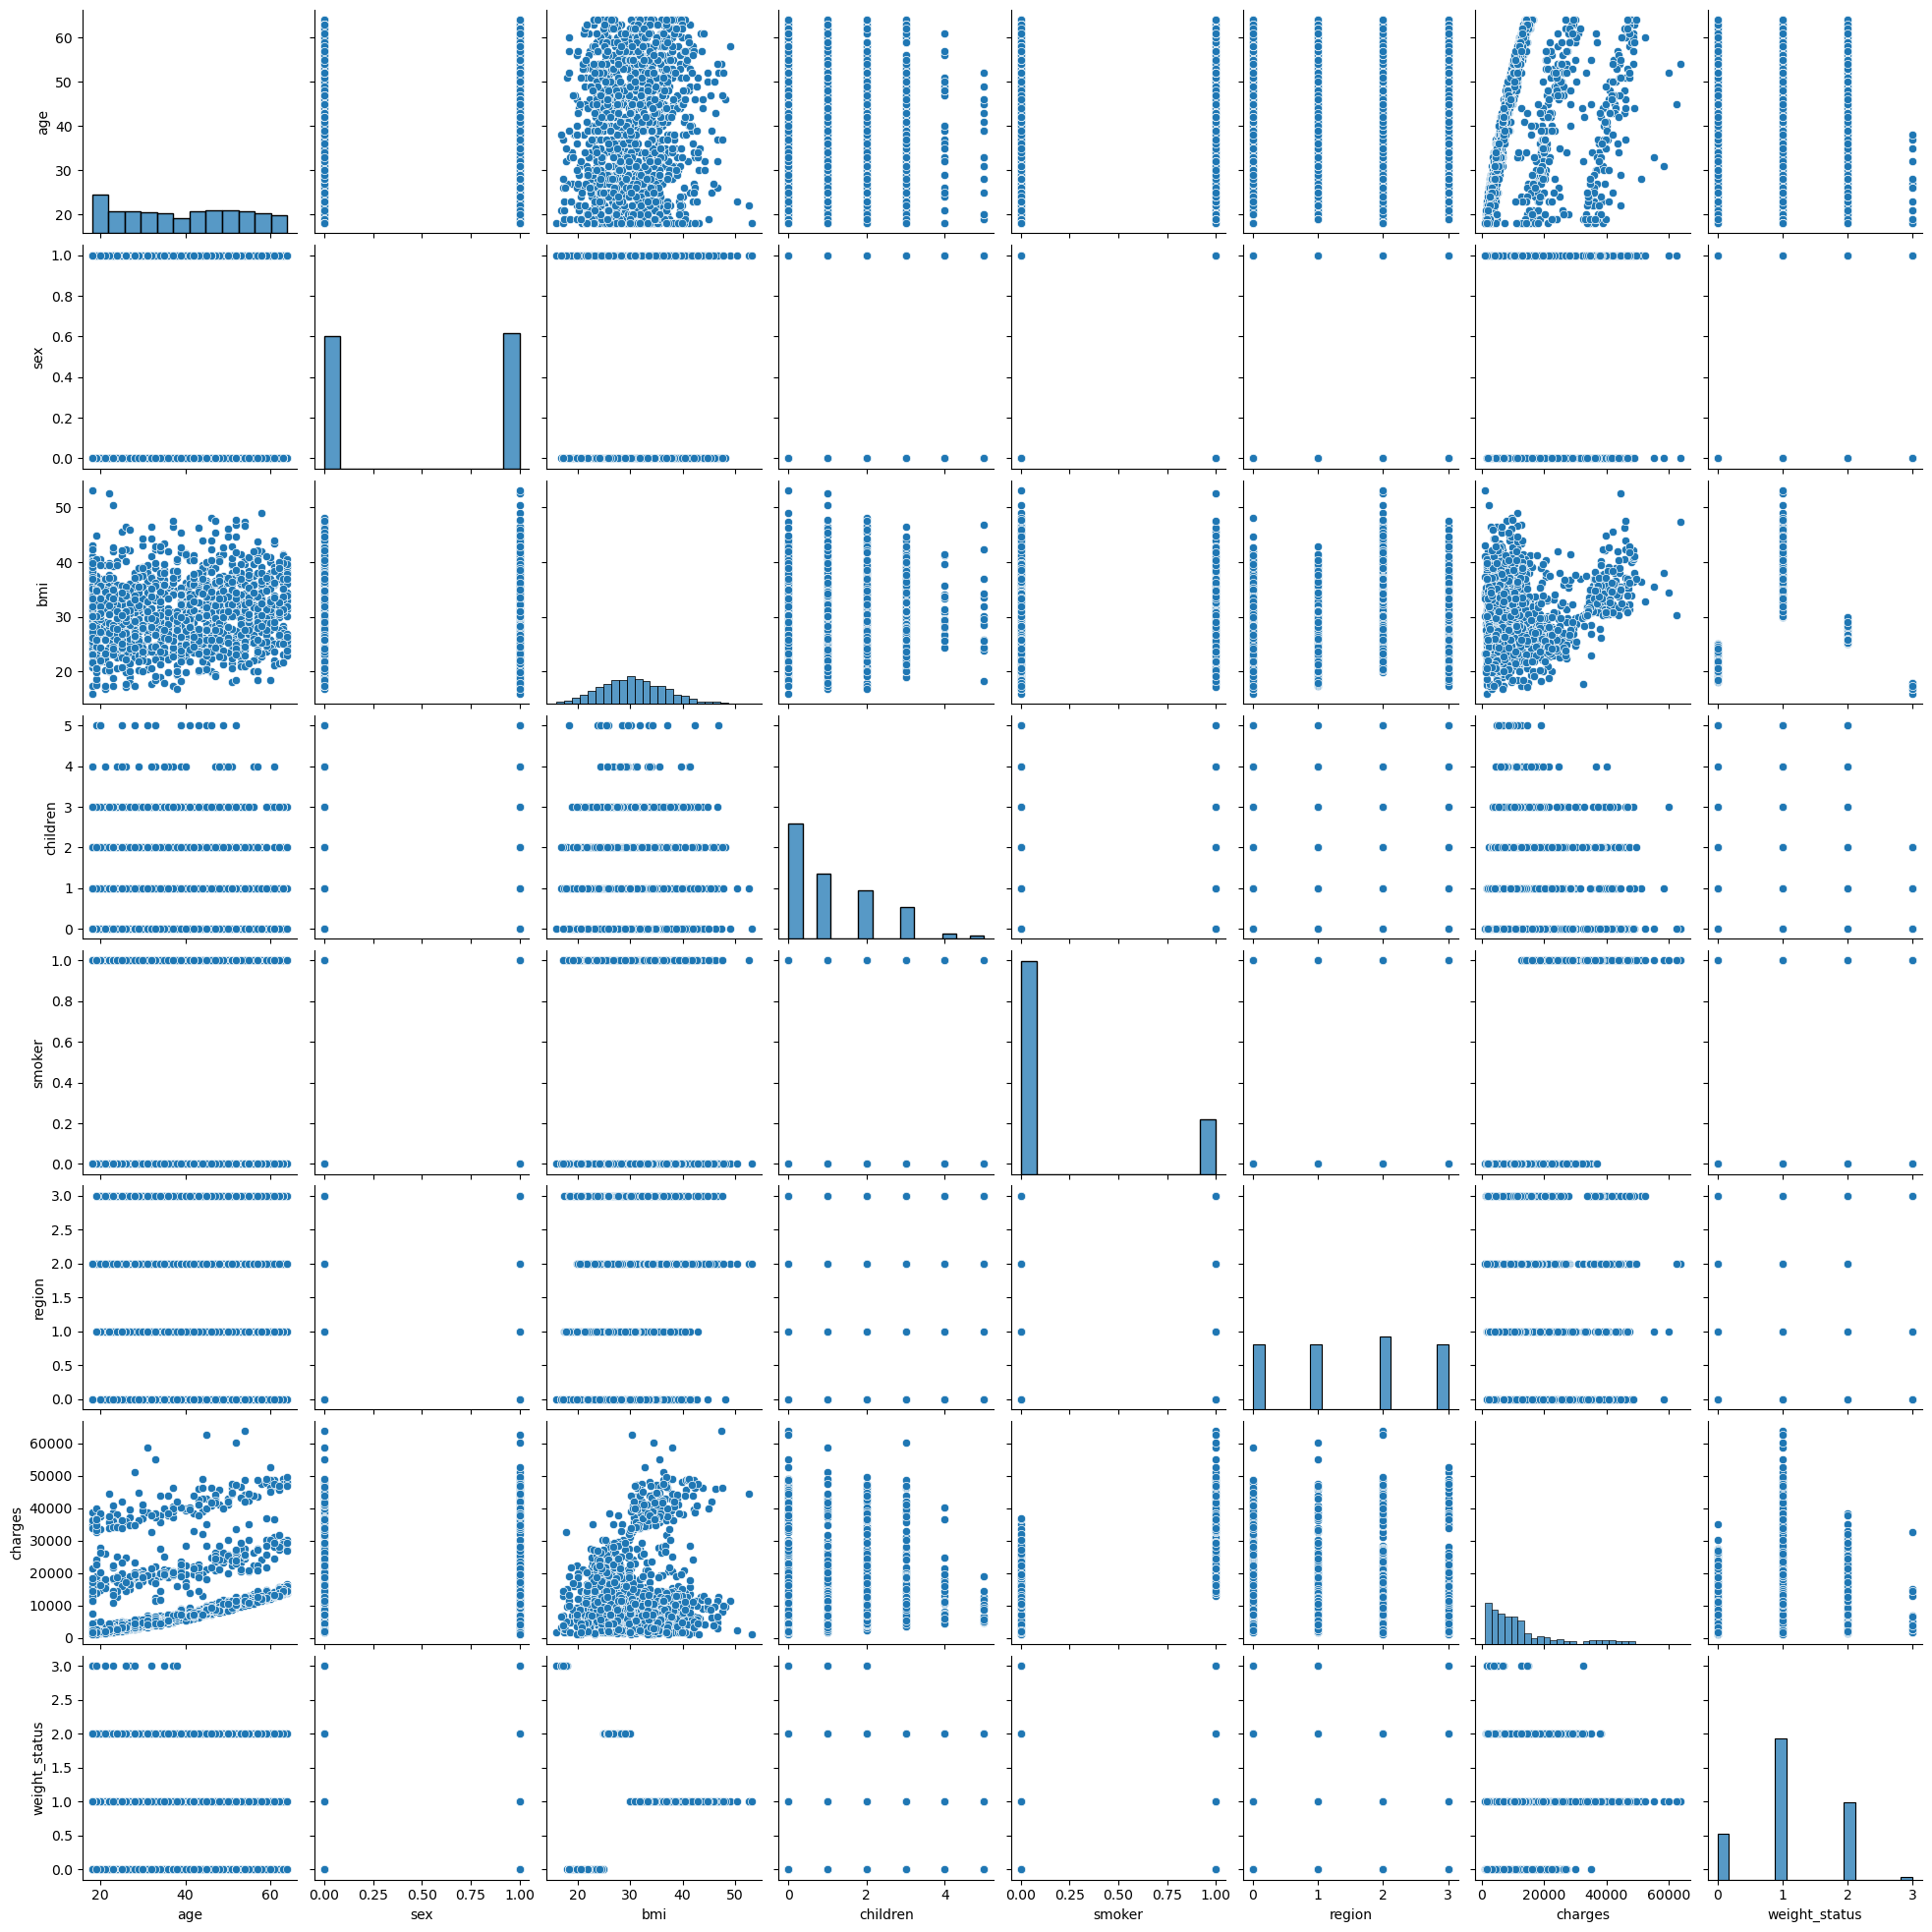

In [35]:
sns.pairplot(df);

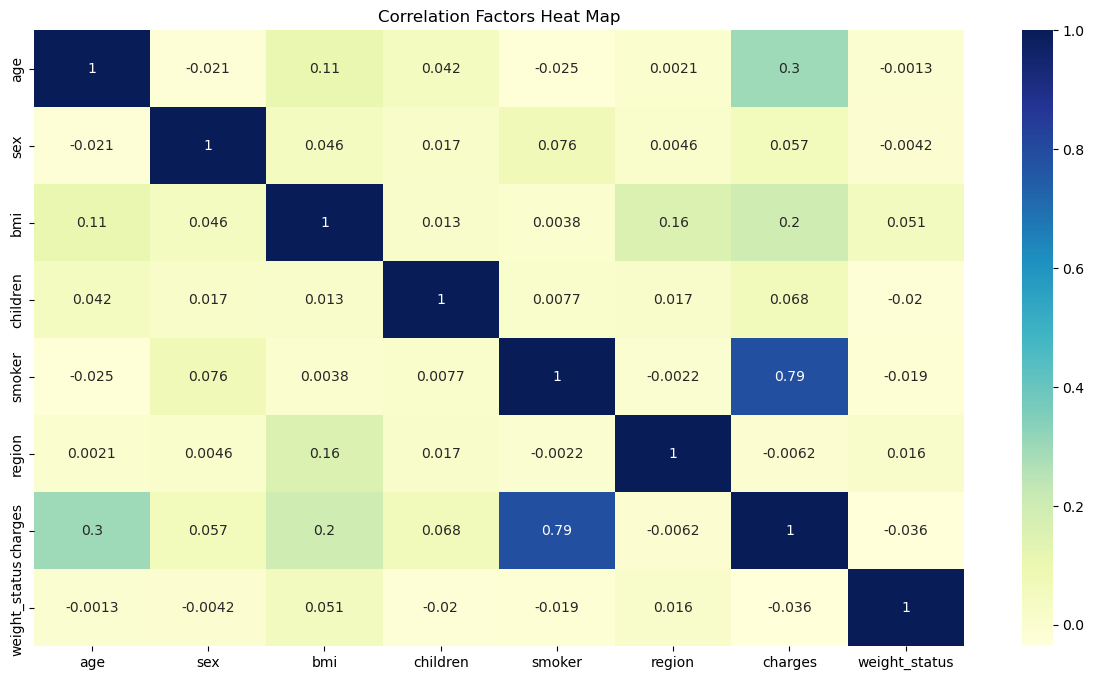

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu');
plt.title('Correlation Factors Heat Map');

- The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).
- This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.

### Machine Learning
The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables.
We will use the following algorithms - 

* Linear Regression
* Decision Tree
* Random Forest
* Ridge Regression
* Lasso Regression

In [37]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [39]:
def model_evaluation(model):
    model.fit(X=x_train, y=y_train)
    preds = model.predict(x_test)
    
    # Mean Squared Error
    MSE = mean_squared_error(y_test, preds)
    
    # Mean Absolute Error
    MAE = mean_absolute_error(y_test, preds)
    
    # R^2 - Coefficient of Determination
    R2 = r2_score(y_test, preds)
    
    # Root Mean Squared Error(RMSE)
    RMSE = np.sqrt(mean_squared_error(y_test, preds))
    
    # Root Mean Squared Log Error(RMSLE)
    RMSLE = np.log(np.sqrt(mean_squared_error(y_test, preds)))
    
    
    print(f"{model} Model Scores")
    print("")
    print(f"Mean Squared Error            : {MSE:.0f}")
    print(f"Mean Absolute Error           : {MAE:.0f}")
    print(f"Root Mean Squared Error       : {RMSE:.0f}")
    print(f"Root Mean Squared Log Error   : {RMSLE:.3f}")
    print("")  
    print(f"R2 Score                      : {R2*100:.2f}%")

In [40]:
Linear_Regression = LinearRegression()
Decision_Tree = DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Ridge_Regression = Ridge()
Lasso_Regression = Lasso()

In [41]:
model_evaluation(Linear_Regression)

LinearRegression() Model Scores

Mean Squared Error            : 31563289
Mean Absolute Error           : 3871
Root Mean Squared Error       : 5618
Root Mean Squared Log Error   : 8.634

R2 Score                      : 80.17%


In [42]:
model_evaluation(Decision_Tree)

DecisionTreeRegressor() Model Scores

Mean Squared Error            : 54518098
Mean Absolute Error           : 3633
Root Mean Squared Error       : 7384
Root Mean Squared Log Error   : 8.907

R2 Score                      : 65.74%


In [43]:
model_evaluation(Random_Forest)

RandomForestRegressor() Model Scores

Mean Squared Error            : 19155587
Mean Absolute Error           : 2647
Root Mean Squared Error       : 4377
Root Mean Squared Log Error   : 8.384

R2 Score                      : 87.96%


In [44]:
model_evaluation(Ridge_Regression)

Ridge() Model Scores

Mean Squared Error            : 31620411
Mean Absolute Error           : 3883
Root Mean Squared Error       : 5623
Root Mean Squared Log Error   : 8.635

R2 Score                      : 80.13%


In [45]:
model_evaluation(Lasso_Regression)

Lasso() Model Scores

Mean Squared Error            : 31569154
Mean Absolute Error           : 3872
Root Mean Squared Error       : 5619
Root Mean Squared Log Error   : 8.634

R2 Score                      : 80.16%


The random forest model score is best among all other model!

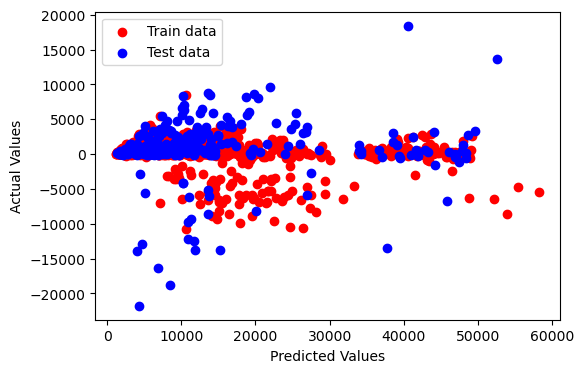

In [46]:
# Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))
Random_Forest.fit(x_train, y_train)

x_train_predic = Random_Forest.predict(x_train)
x_test_predic = Random_Forest.predict(x_test)

# Train data
plt.scatter(x_train_predic, x_train_predic - y_train, c = 'red', marker = 'o', label = 'Train data')
# Test data
plt.scatter(x_test_predic, x_test_predic - y_test, c = 'blue', marker = 'o', label = 'Test data')

plt.xlabel("Predicted Values")
plt.ylabel('Actual Values')
plt.legend(loc = 'upper left')
plt.show()

Now that we have a graph of the actual vs predicted values, let's see the features that contribute heavily towards the prediction. We can do so by performing a feature importance ranking.
- The feature importance method for Random Forests is able draw conclusions about what features contribute most to the decision making in the model and help the user to better understand the drivers behind the model.

### Feature Importance Ranking

1. smoker - 0.6080
2. bmi - 0.2091
3. age - 0.1362
4. children - 0.0208
5. region - 0.0142
6. weight_status - 0.0060
7. sex - 0.0058


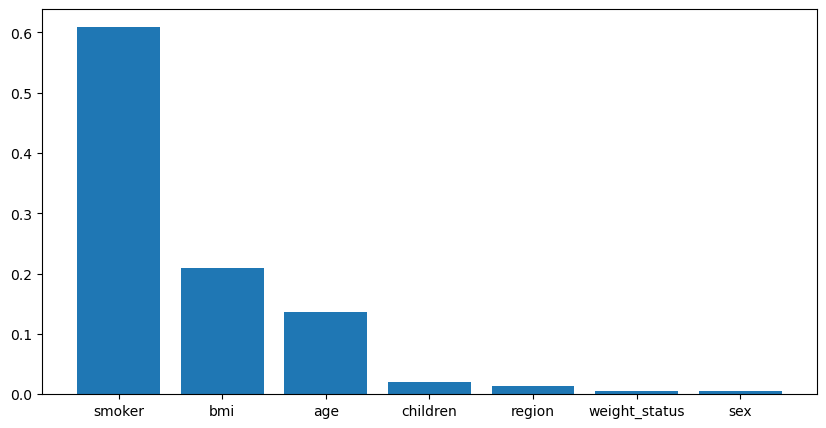

In [47]:
importances = Random_Forest.feature_importances_
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region', 'weight_status']

imp_list = []
for value in range(x.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print(f"{value + 1}. {variable} - {importances[indices[value]]:.4f}")
    
# Plotting the feature importances
plt.figure(figsize=(10, 5))
plt.bar(imp_list, importances[indices]);

Based on the feature importances, we can see that the sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual. Therefore, we can eliminate those variables and generate another model to predict the insurance cost without accounting for those variables.
We are only choosing 2 lowest contributing variables to eliminate because it would not be accurate to remove too many potentially unimportant independent variables when generating a model.

## Polynomial Regression

Prepare data again by eliminating unimportant variables and splitting the data into training and testing data.

In [48]:
from sklearn.preprocessing import PolynomialFeatures

x = df.drop(['charges','sex','region', 'weight_status'], axis = 1)
y = df.charges

x.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [49]:
Polinomial_Features = PolynomialFeatures(degree=2)
x_pol = Polinomial_Features.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.2, random_state = 0)
x.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [50]:
Polynomial_Regression = LinearRegression()
model_evaluation(Polynomial_Regression)

LinearRegression() Model Scores

Mean Squared Error            : 18895160
Mean Absolute Error           : 2824
Root Mean Squared Error       : 4347
Root Mean Squared Log Error   : 8.377

R2 Score                      : 88.13%


In [51]:
# Predicting the Medical Charges
preds = Polynomial_Regression.predict(x_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': preds})
final_values

,Actual values,Predicted values
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
